# Estados puros

A partir de um estado inicial $|\psi_0\rangle = |0\rangle^{\otimes N}$ desejamos otimizar um circuito U que leva de $|\psi\rangle$ para um estado preparado $|\phi\rangle$, ou seja:

$|\phi\rangle = U(\theta_1, \theta_2, \dots, \theta_n)|\psi_0\rangle $

In [10]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [3]:
c0 = np.random.rand()**0.5
c1 = (1.0 - c0**2)**0.5
target_state = np.array([[c0],[c1]])
print(target_state)

[[0.60803559]
 [0.79390977]]


In [6]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-7_u8ycb1
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-7_u8ycb1
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit dd5b32bc8d7e2804c2618f1c822a05311883f2ef
  Preparing metadata (setup.py) ... done
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17549 sha256=4b8b140f5c87815ee07b01b5bf542271e3b23d1b1d50e2c31b22bcca504dfd5a
  Stored in directory: /tmp/pip-ephem-wheel-cache-jy8c1o7h/wheels/75/76/cd/ff92751b9ab5f2d12c73e551ee92adf4615fb6b7d37b77f0e4
Successfully built qiskit-textbook


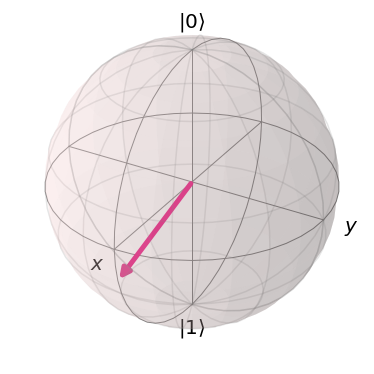

In [11]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
theta = 2*np.arccos(c0)
target_expectedValue = np.cos(theta)
phi = 0
coords = [theta, phi, 1]
plot_bloch_vector_spherical(coords)

In [13]:
device = qml.device('qiskit.aer', wires=1, backend='qasm_simulator')

params = np.random.normal(0, np.pi/2, (2), requires_grad=True)

@qml.qnode(device, doff_method='parameter-shift')

def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)

    return qml.expval(qml.PauliZ(0))

fig, ax = qml.draw_mpl(circuit, decimals=2)(params)
plt.show()

DeviceError: Device does not exist. Make sure the required plugin is installed.